# **eCommerce Transactions**

# Customer Segmentation / Clustering



In [28]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

merged_data = pd.merge(transactions, customers, on='CustomerID')

customer_segments = merged_data.groupby(['CustomerID', 'Region']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()



# Elbow Method

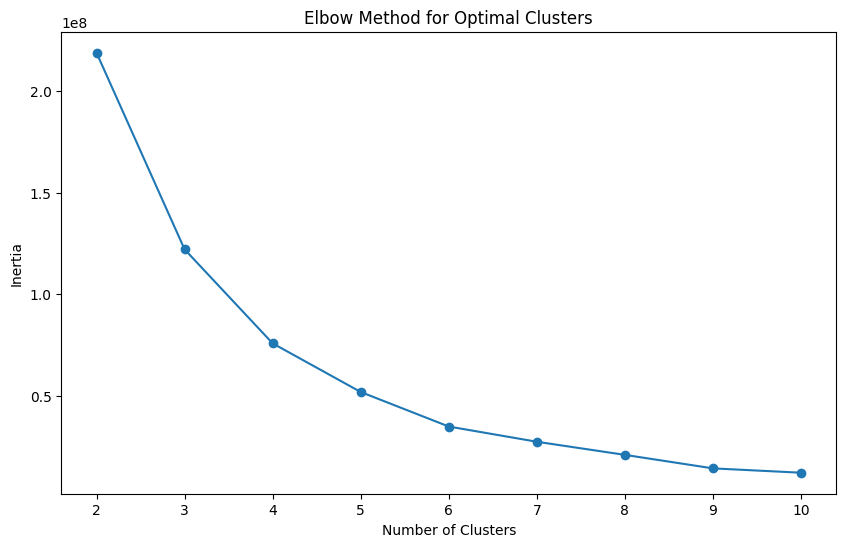

In [29]:
# Finding the optimal number of clusters
inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(customer_segments[['TotalValue', 'Quantity']])
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Visualizing the clusters using Scatter Plot

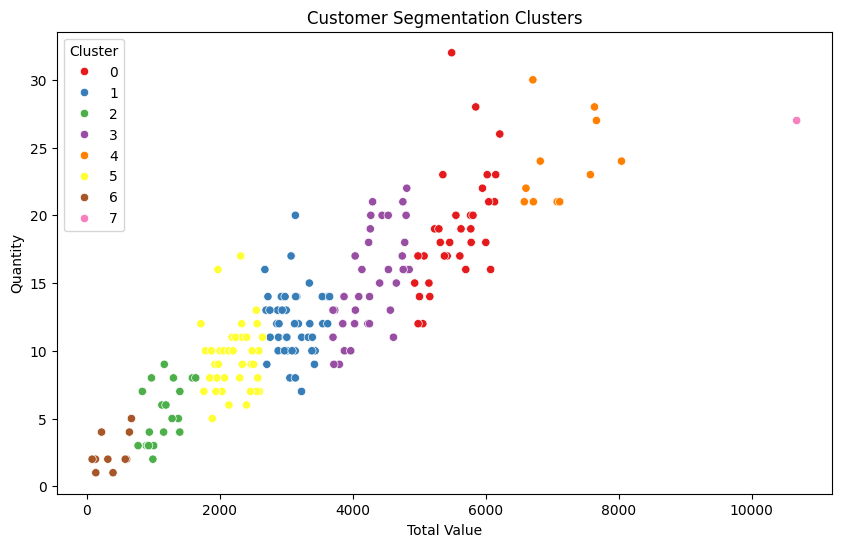

Davies-Bouldin Index: 0.4644838757580652
Silhouette Coefficient: 0.532039360980534


In [31]:
# Performing KMeans clustering with the optimal number of clusters
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_segments['Cluster'] = kmeans.fit_predict(customer_segments[['TotalValue', 'Quantity']])

# Calculating clustering metrics
db_index = davies_bouldin_score(customer_segments[['TotalValue', 'Quantity']], customer_segments['Cluster'])
silhouette_avg = silhouette_score(customer_segments[['TotalValue', 'Quantity']], customer_segments['Cluster'])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segments, x='TotalValue', y='Quantity', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()
print('Davies-Bouldin Index:', db_index)
print('Silhouette Coefficient:', silhouette_avg)